**IMPORTING LIBRARIES**

In [222]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


**DATA IMPORT AND PREPROCESSING**

In [223]:
dataset_path = r'C:\Users\Lennox\Documents\MSU\dissertations\muzo\cimas sentiment\final\cimas_feedback_dataset_with_category.csv'
df = pd.read_csv(dataset_path)

In [224]:
print(f"Dataset loaded: {len(df)} samples.")

Dataset loaded: 874 samples.


In [225]:
# Preprocessing
# Encoding the 'category' column
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [226]:
# Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post')

In [227]:
X = padded
y_sentiment = df['label'].values
y_category = df['category_encoded'].values

In [228]:
# Train/Test Split
X_train, X_test, y_sentiment_train, y_sentiment_test, y_category_train, y_category_test = train_test_split(
    X, y_sentiment, y_category, test_size=0.2, random_state=42
)

#### **BUILDING MODELS**

**LOGISTIC REGERESSION MODEL**

In [229]:
# LOGISTIC REGRESSION MODEL
X_text = df['text'].values
y_sentiment = df['label'].values

# 2. Shuffle and split before any processing
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment
)

logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression())
])

# 4. Train and evaluate
logreg_pipeline.fit(X_train_text, y_train)
y_pred = logreg_pipeline.predict(X_test_text)



**LOGISTIC REGRESSION MODEL EVALUATION**

In [230]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.96      1.00      0.98        85
           2       1.00      0.25      0.40         4

    accuracy                           0.98       175
   macro avg       0.99      0.75      0.79       175
weighted avg       0.98      0.98      0.97       175

[[85  1  0]
 [ 0 85  0]
 [ 0  3  1]]


**NAIVE BAYES MODEL**

In [231]:
from sklearn.naive_bayes import MultinomialNB

# Building pipeline: TF-IDF + Naive Bayes
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])

# Training the Naive Bayes model
nb_pipeline.fit(X_train_text, y_train)

# Predicting
y_pred_nb = nb_pipeline.predict(X_test_text)


**NAIVE BAYES MODEL EVALUATION**

In [232]:
print("🔍 Multinomial Naive Bayes Performance:\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

🔍 Multinomial Naive Bayes Performance:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.96      1.00      0.98        85
           2       1.00      0.25      0.40         4

    accuracy                           0.98       175
   macro avg       0.99      0.75      0.79       175
weighted avg       0.98      0.98      0.97       175

Confusion Matrix:
 [[85  1  0]
 [ 0 85  0]
 [ 0  3  1]]


**CHECKING DATA ISSUES QUALITY**

In [233]:
#CHECKING MOST FREQUENT WORDS IN POSITIVE AND NEGATIVE REVIEWS
from collections import Counter

pos_words = ' '.join(df[df['label'] == 1]['text']).split()
neg_words = ' '.join(df[df['label'] == 0]['text']).split()

print(" Common Positive Words:", Counter(pos_words).most_common(10))
print(" Common Negative Words:", Counter(neg_words).most_common(10))


 Common Positive Words: [('service', 89), ('the', 76), ('new', 74), ('customer', 68), ('zvikuru', 67), ('renyu', 66), ('was', 66), ('you', 66), ('care', 66), ('basa', 65)]
 Common Negative Words: [('customer', 72), ('received', 72), ('care', 71), ('ever', 69), ('forever', 68), ('in', 68), ('takes', 67), ('insurance', 66), ('service', 66), ('delivery', 66)]


**SVM - LINEAR SUPPORT VECTOR CLASSIFIER**

In [234]:
from sklearn.svm import LinearSVC

# Building pipeline: TF-IDF + SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LinearSVC())
])

# Training the SVM model
svm_pipeline.fit(X_train_text, y_train)

# Predicting on the test set
y_pred_svm = svm_pipeline.predict(X_test_text)


**SVM EVALUATION**

In [235]:

print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.98      1.00      0.99        85
           2       1.00      0.75      0.86         4

    accuracy                           0.99       175
   macro avg       0.99      0.91      0.95       175
weighted avg       0.99      0.99      0.99       175

Confusion Matrix:
 [[85  1  0]
 [ 0 85  0]
 [ 0  1  3]]


#### **MODEL CLASSIFICATION REPORTS**

In [236]:
from sklearn.metrics import classification_report
# Logistic Regression
report_logreg = classification_report(y_test, y_pred, output_dict=True)
# Naive Bayes
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
# SVM
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

In [237]:
import pandas as pd
df_logreg = pd.DataFrame(report_logreg).transpose()
df_nb = pd.DataFrame(report_nb).transpose()
df_svm = pd.DataFrame(report_svm).transpose()


In [238]:
print("\n🔍 Logistic Regression Classification Report")
print(df_logreg.round(4))

print("\n🔍 Naive Bayes Classification Report")
print(df_nb.round(4))

print("\n🔍 SVM Classification Report")
print(df_svm.round(4))



🔍 Logistic Regression Classification Report
              precision  recall  f1-score   support
0                1.0000  0.9884    0.9942   86.0000
1                0.9551  1.0000    0.9770   85.0000
2                1.0000  0.2500    0.4000    4.0000
accuracy         0.9771  0.9771    0.9771    0.9771
macro avg        0.9850  0.7461    0.7904  175.0000
weighted avg     0.9782  0.9771    0.9722  175.0000

🔍 Naive Bayes Classification Report
              precision  recall  f1-score   support
0                1.0000  0.9884    0.9942   86.0000
1                0.9551  1.0000    0.9770   85.0000
2                1.0000  0.2500    0.4000    4.0000
accuracy         0.9771  0.9771    0.9771    0.9771
macro avg        0.9850  0.7461    0.7904  175.0000
weighted avg     0.9782  0.9771    0.9722  175.0000

🔍 SVM Classification Report
              precision  recall  f1-score   support
0                1.0000  0.9884    0.9942   86.0000
1                0.9770  1.0000    0.9884   85.0000
2    

**CONFUSIN MATRICES**

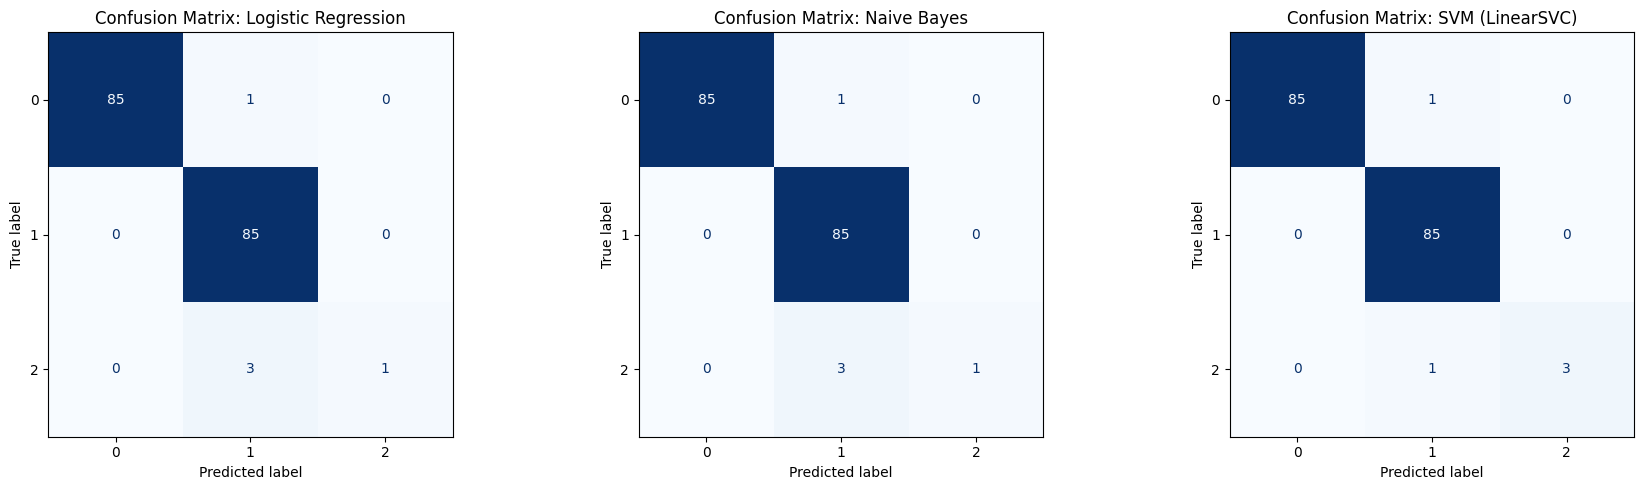

In [239]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ["Logistic Regression", "Naive Bayes", "SVM (LinearSVC)"]
predictions = [y_pred, y_pred_nb, y_pred_svm]

for ax, preds, title in zip(axes, predictions, titles):
    cm = confusion_matrix(y_test, preds, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(f"Confusion Matrix: {title}")

plt.tight_layout()
plt.show()

**MISCLASSIFICATION COUNT PLOT**

C:\Users\Lennox\AppData\Local\Temp\ipykernel_20588\4105771280.py:35: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lennox\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


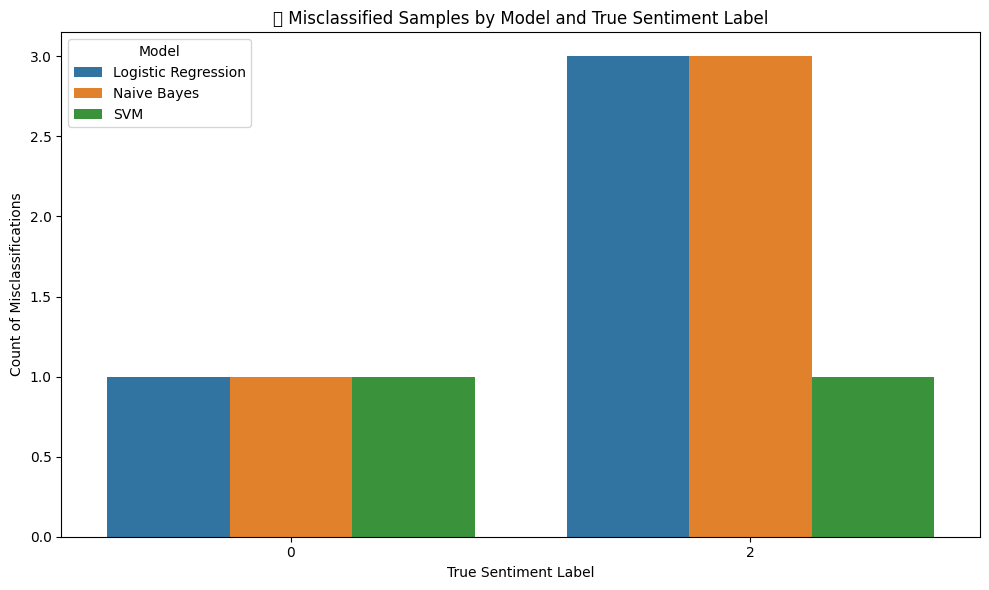

In [240]:
import seaborn as sns

# Identifying misclassified samples
misclassified_logreg = (y_test != y_pred)
misclassified_nb = (y_test != y_pred_nb)
misclassified_svm = (y_test != y_pred_svm)

# Preparing error data
error_data = {
    "Model": [],
    "True Label": []
}

for i in range(len(y_test)):
    if misclassified_logreg[i]:
        error_data["Model"].append("Logistic Regression")
        error_data["True Label"].append(y_test[i])
    if misclassified_nb[i]:
        error_data["Model"].append("Naive Bayes")
        error_data["True Label"].append(y_test[i])
    if misclassified_svm[i]:
        error_data["Model"].append("SVM")
        error_data["True Label"].append(y_test[i])

# Converting to DataFrame
df_errors = pd.DataFrame(error_data)

# Plot misclassification counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df_errors, x="True Label", hue="Model")
plt.title("🔍 Misclassified Samples by Model and True Sentiment Label")
plt.xlabel("True Sentiment Label")
plt.ylabel("Count of Misclassifications")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


**DEPLOYING THE MODEL**

In [241]:
import pickle

# Saving the entire pipeline (vectorizer + model)
with open("svm_pipeline.pkl", "wb") as f:
    pickle.dump(svm_pipeline, f)
